# Predicting Heart Failure

**Purpose:** In this project I will be exploring a clinical dataset to create a machine learning model that can predict patient heart failure survival. By exploring the data, the aim will be to select the most important features that can be used for a machine learning algorithm. Different machine learning algorithms will be created in order to evaluate the best performing model.

Let's import the libraries we will be using for the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind')

Now, we can retreive the dataset.

In [2]:
data = pd.read_csv('clinical_records_heart_failure.csv')

In order for all readers to understand the different column categories and their significance, we can create a dictionary with definitions.

In [3]:
column_dictionary = {'age': 'age of individual', 
                     'anaemia': 'condition in which the number of red blood cells or the haemoglobin concentration within them is lower than normal (boolean).',
                     'creatine phosphokinase': 'level of the CPK enzyme in the blood (mcg/L). In the context of heart failure, CPK can be used as a diagnostic marker and is often measured in blood tests. Elevated levels of CPK in the bloodstream can indicate damage or injury to heart muscle cells.',
                     'diabetes': 'Diabetes is a chronic metabolic disorder characterized by high blood glucose levels due to inadequate insulin production or impaired insulin action (boolean).',
                     'ejection fraction': 'a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction.',
                     'high blood pressure': 'blood hypertension.',
                     'platelets': 'small and colorless cell fragments in the blood that play a vital role in clotting to prevent excessive bleeding and promote wound healing.',
                     'serum creatinine': 'a waste product generated from muscle metabolism that is commonly measured in blood tests to assess kidney function which can occur due to impaired cardiac output.',
                     'serum sodium': 'evaluated as a measure of fluid balance and to assess the severity of congestion which can affect nerve and muscle function.',
                     'sex': 'female or male (boolean).',
                     'smoking': 'no or yes (boolean).',
                     'time': 'follow-up as a day variable ex: 2 = 2 days.',
                     'death event': 'patient survived or died (boolean).'
                    }

print('Dictionary')
print('----------')
for key, value in column_dictionary.items():
    print(f'{key}: {value}')
    print('')

Dictionary
----------
age: age of individual

anaemia: condition in which the number of red blood cells or the haemoglobin concentration within them is lower than normal (boolean).

creatine phosphokinase: level of the CPK enzyme in the blood (mcg/L). In the context of heart failure, CPK can be used as a diagnostic marker and is often measured in blood tests. Elevated levels of CPK in the bloodstream can indicate damage or injury to heart muscle cells.

diabetes: Diabetes is a chronic metabolic disorder characterized by high blood glucose levels due to inadequate insulin production or impaired insulin action (boolean).

ejection fraction: a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction.

high blood pressure: blood hypertension.

platelets: small and colorless cell fragments in the blood that play a vital role in clotting to prevent excessive bleeding and promote wound healing.

serum creatinine: a waste product generated fr

Preview of our dataset:

In [4]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


The following is a visualization of the distribution and frequency of our dataset's column variables:

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

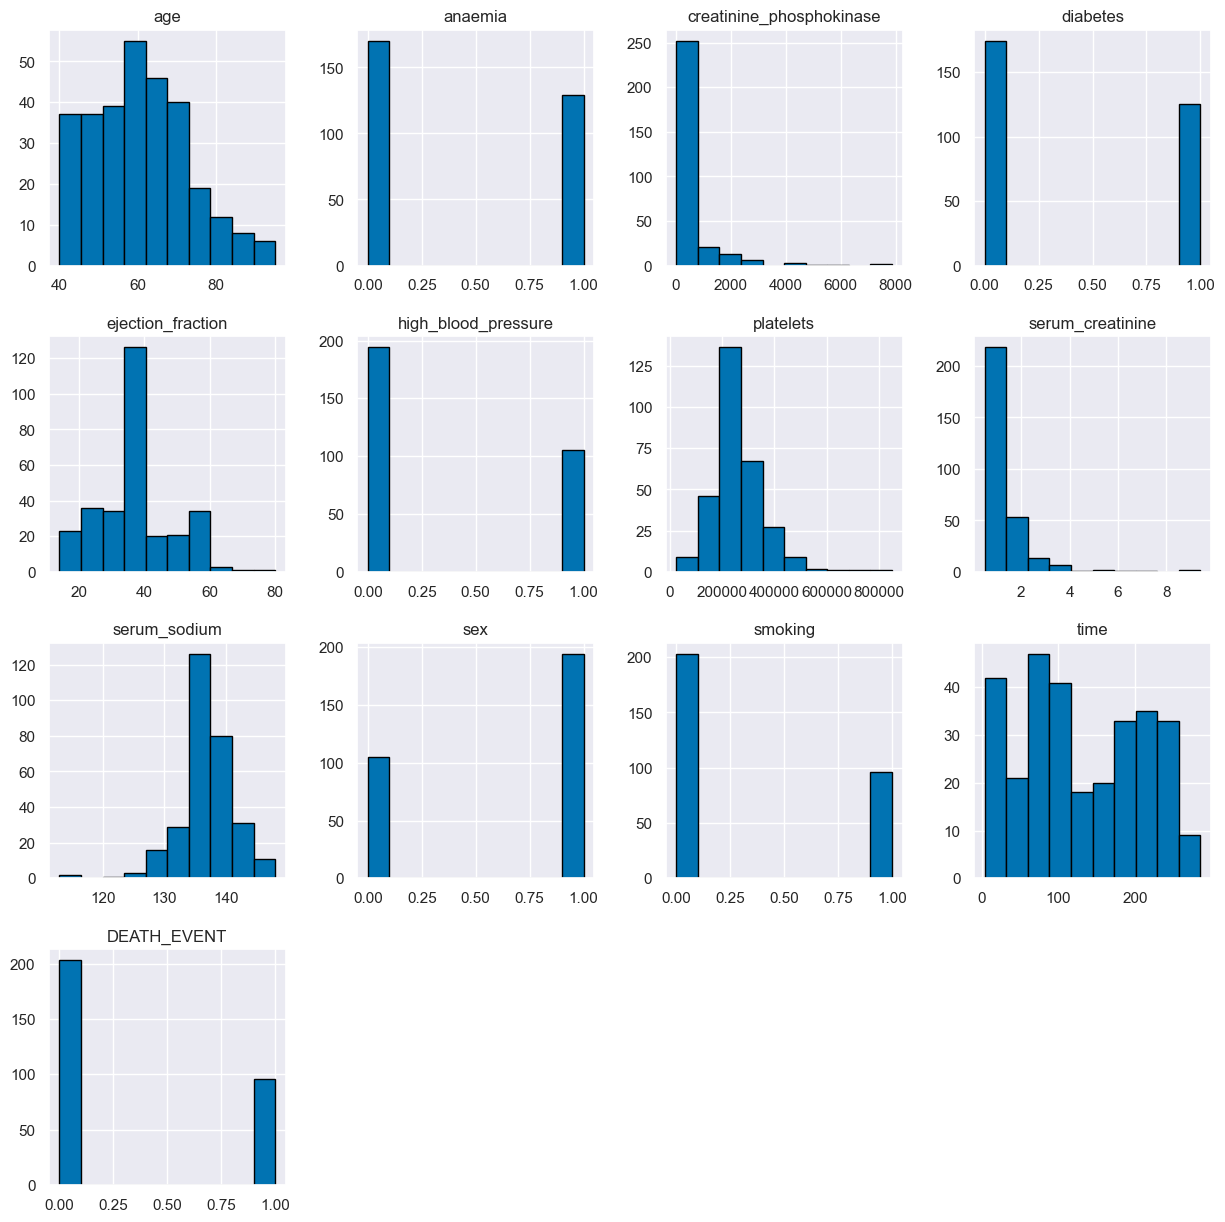

In [8]:
data.hist(figsize=(15,15), edgecolor='black')

We can see the number of survivors and deaths of patients:

In [9]:
survived_or_died = data['DEATH_EVENT'].value_counts()
print(survived_or_died)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


We can express patient survival count as a percentage instead by normalizing the values. In this instance we can create a pie plot visual as well:

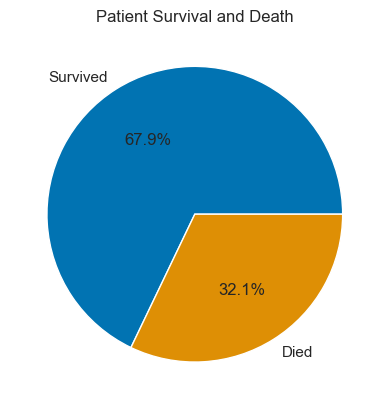

In [10]:
plt.pie(survived_or_died, labels=['Survived', 'Died'], autopct='%1.1f%%')
plt.title('Patient Survival and Death')
plt.show()

Let's take a closer look at the age of the patients using a bar chart:

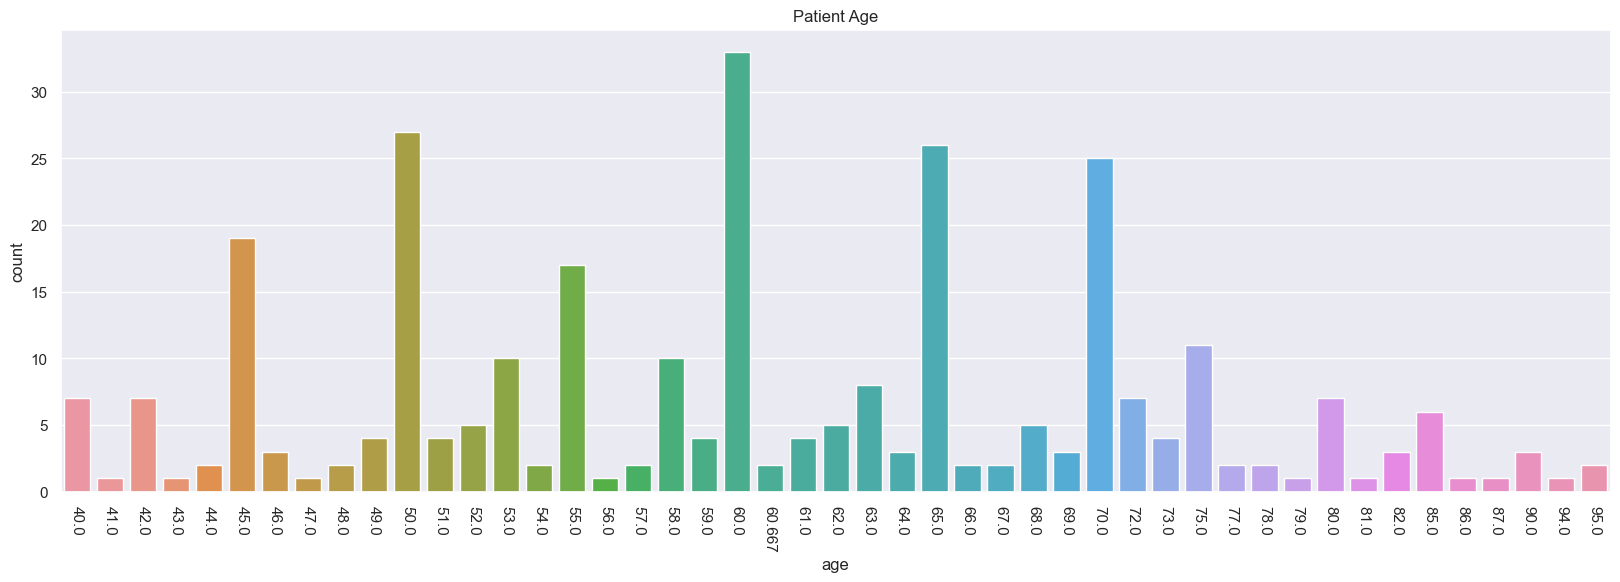

In [11]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['age'])
plt.xticks(rotation=-90)
plt.title('Patient Age')
plt.show()

We can analyze the visual even further by categorizing age into bins by decade to see the different age groups:

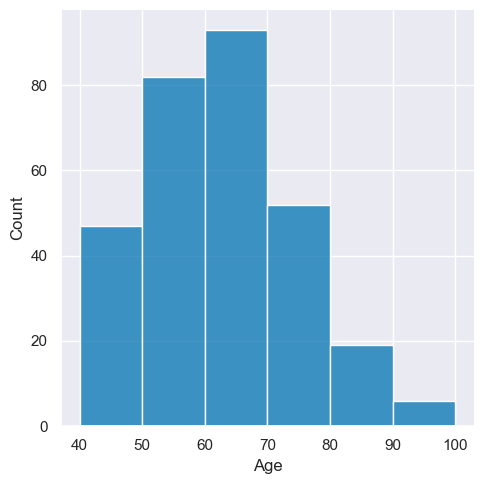

In [12]:
sns.displot(data['age'], bins=[40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Now we can use a violin plot to visualize the distribution of age against survival/death

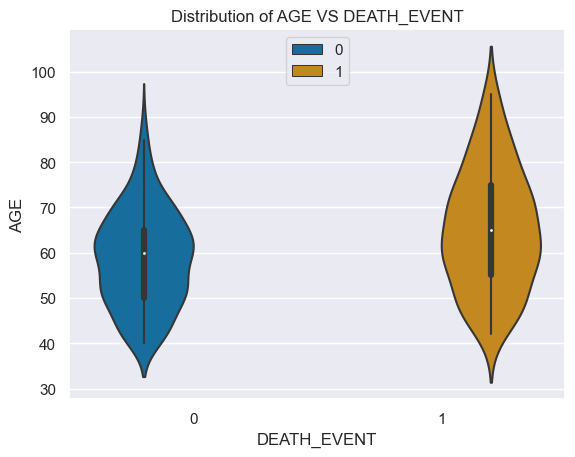

In [13]:
sns.violinplot(data=data, x="DEATH_EVENT", y="age", hue="DEATH_EVENT")
plt.xlabel("DEATH_EVENT")
plt.ylabel("AGE")
plt.title("Distribution of AGE VS DEATH_EVENT")
plt.legend(loc='upper center')
plt.show()

We can use a pie chart to verify sex of patient:

In [14]:
sex_counts = data['sex'].value_counts()
sex_counts

1    194
0    105
Name: sex, dtype: int64

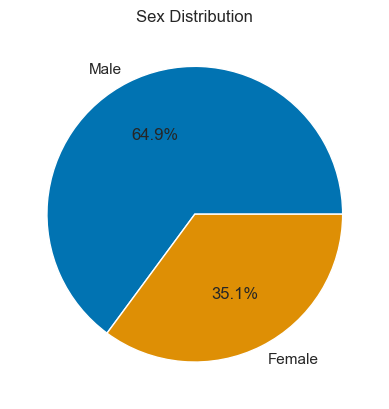

In [15]:
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

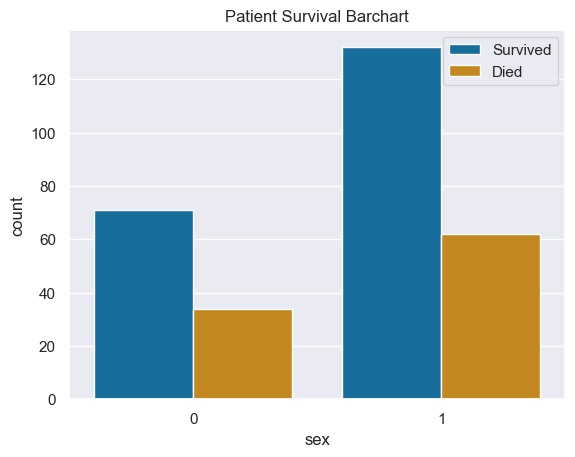

In [16]:
sns.countplot(data=data, x='sex', hue='DEATH_EVENT')
plt.legend(['Survived', 'Died'])
plt.title('Patient Survival Barchart')
plt.show()

Using groupby for sex with respect to different variables allow us to see if there are any differences between males/females:

In [17]:
sex_smokers = data.groupby('sex')['smoking'].value_counts()
sex_smokers

sex  smoking
0    0          101
     1            4
1    0          102
     1           92
Name: smoking, dtype: int64

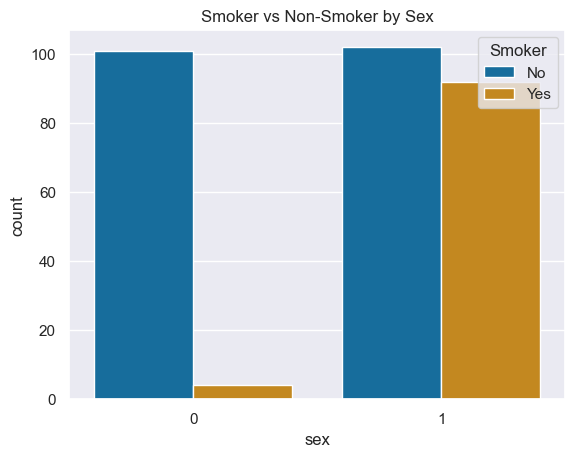

In [18]:
sns.countplot(data=data, x='sex', hue='smoking')
plt.legend(title='Smoker', labels=['No', 'Yes'])
plt.title('Smoker vs Non-Smoker by Sex')
plt.show()

In [19]:
sex_anaemia = data.groupby('sex')['anaemia'].value_counts()
sex_anaemia

sex  anaemia
0    0           53
     1           52
1    0          117
     1           77
Name: anaemia, dtype: int64

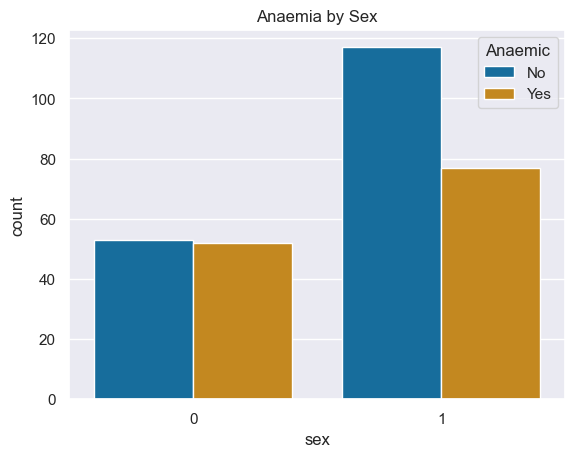

In [20]:
sns.countplot(data=data, x='sex', hue='anaemia')
plt.title('Anaemia by Sex')
plt.legend(title='Anaemic', labels=['No', 'Yes'])
plt.show()

In [21]:
sex_diabetes = data.groupby('sex')['diabetes'].value_counts()
sex_diabetes

sex  diabetes
0    1            55
     0            50
1    0           124
     1            70
Name: diabetes, dtype: int64

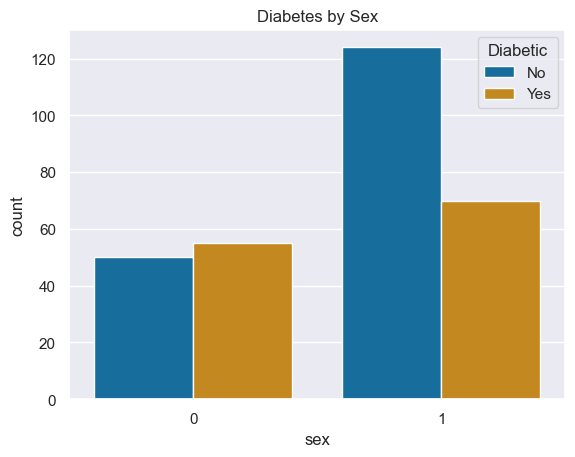

In [22]:
sns.countplot(data=data, x='sex', hue='diabetes')
plt.title('Diabetes by Sex')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.show()

In [23]:
sex_BP = data.groupby('sex')['high_blood_pressure'].value_counts()
sex_BP

sex  high_blood_pressure
0    0                       61
     1                       44
1    0                      133
     1                       61
Name: high_blood_pressure, dtype: int64

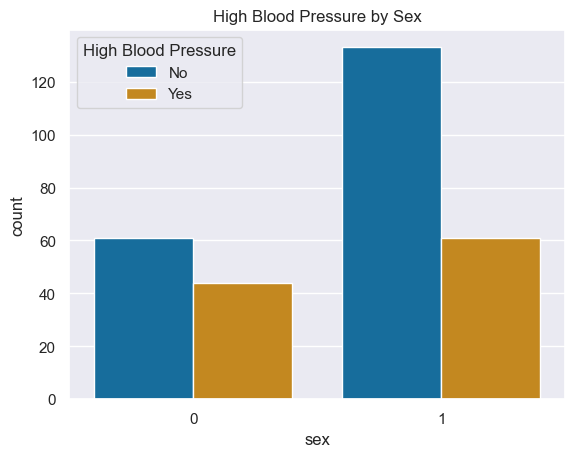

In [24]:
sns.countplot(data=data, x='sex', hue='high_blood_pressure')
plt.title('High Blood Pressure by Sex')
plt.legend(title='High Blood Pressure', labels=['No', 'Yes'])
plt.show()

We can look at the distribution of different variables.

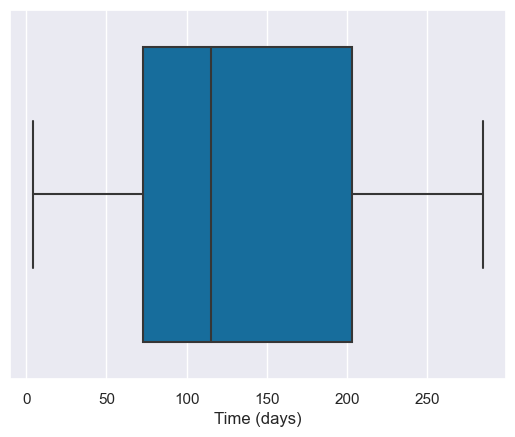

In [25]:
sns.boxplot(data=data, x='time')
plt.xlabel('Time (days)')
plt.show()

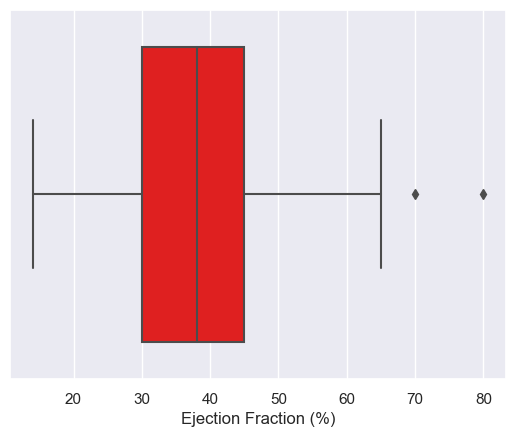

In [26]:
sns.boxplot(data=data, x='ejection_fraction', color='red')
plt.xlabel('Ejection Fraction (%)')
plt.show()

Ejection Fraction has two outliers (above maximum whisker) that we can remove from the dataset.

In [27]:
data['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Maximum whisker set at IQR * 1.5 from 75% quantile
* where IQR = 75% quantile - 25% quantile

In [28]:
max_whisker = (45-30) * 1.5 + 45
print(max_whisker)

67.5


In [29]:
data[data['ejection_fraction'] > 67.5]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [30]:
data = data[data['ejection_fraction'] <= 67.5]

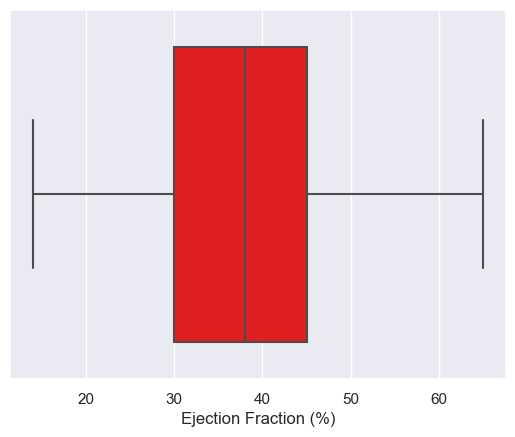

In [31]:
sns.boxplot(data=data, x='ejection_fraction', color='red')
plt.xlabel('Ejection Fraction (%)')
plt.show()


The purpose of a correlation matrix is to demonstrate the correlation coefficients between variables:

In [32]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\alfon\AppData\Local\Temp\ipykernel_42596\286891049.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.11,0.08,0.09,-0.05,0.19,-0.05,0.06,0.01,-0.23,0.26
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.03,-0.04,0.03,0.04,-0.09,-0.11,-0.15,0.06
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.01,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.11,-0.01,-0.01,1.00,0.01,-0.01,0.09,-0.03,-0.09,-0.17,-0.15,0.03,0.00
ejection_fraction,0.08,0.03,-0.04,0.01,1.00,0.02,0.09,-0.09,0.18,-0.12,-0.05,0.05,-0.28
high_blood_pressure,0.09,0.03,-0.07,-0.01,0.02,1.00,0.06,-0.04,0.04,-0.10,-0.05,-0.20,0.07
platelets,-0.05,-0.04,0.02,0.09,0.09,0.06,1.00,-0.01,0.06,-0.13,0.03,0.01,-0.04
serum_creatinine,0.19,0.03,-0.01,-0.03,-0.09,-0.04,-0.01,1.00,-0.21,0.04,-0.01,-0.19,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.21,1.00,-0.03,0.01,0.09,-0.20
sex,0.06,-0.09,0.08,-0.17,-0.12,-0.10,-0.13,0.04,-0.03,1.00,0.44,-0.02,-0.00


# Feature Selection

We will now use the relevant variables in the dataset for predictive modeling.

[0.09474816 0.02693659 0.07166424 0.02812346 0.12980493 0.02549983
 0.06880126 0.10468653 0.09029732 0.02586912 0.02779291 0.30577564]


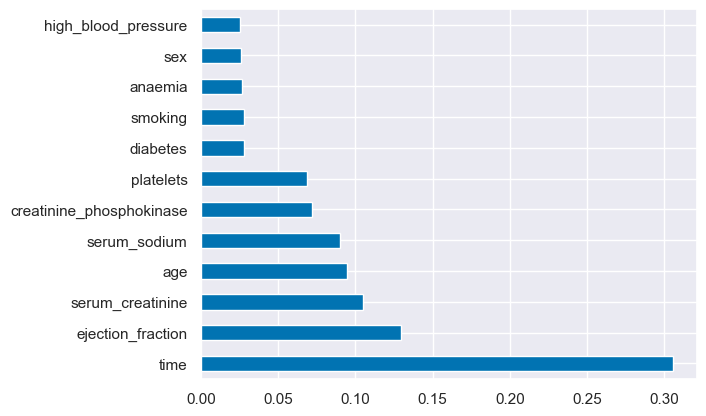

In [33]:
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

We will select the 4 features with the highest correlation: 
* Time
* Ejection Fraction
* Serum Creatinine
* Age

In [34]:
new_data = data[['age', 'ejection_fraction', 'serum_creatinine', 'time','DEATH_EVENT']]
new_data

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1
...,...,...,...,...,...
294,62.0,38,1.1,270,0
295,55.0,38,1.2,271,0
296,45.0,60,0.8,278,0
297,45.0,38,1.4,280,0


# Model Preparation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [36]:
x = new_data.drop('DEATH_EVENT', axis=1)
y = new_data.DEATH_EVENT

In [37]:
print(f' x.shape: {x.shape} \n y.shape: {y.shape}')

 x.shape: (297, 4) 
 y.shape: (297,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [39]:
print(x_train)
print(y_train)

      age  ejection_fraction  serum_creatinine  time
281  70.0                 40               2.7   250
234  53.0                 45               1.1   209
171  52.0                 40               0.9   146
247  64.0                 25               2.4   214
35   69.0                 35               3.5    30
..    ...                ...               ...   ...
254  53.0                 60               1.0   215
118  65.0                 60               0.9    94
53   70.0                 50               1.0    44
34   65.0                 50               1.0    29
131  60.0                 45               6.1   107

[207 rows x 4 columns]
281    0
234    0
171    0
247    0
35     1
      ..
254    0
118    0
53     1
34     1
131    0
Name: DEATH_EVENT, Length: 207, dtype: int64


# Feature Scaling

We will use standard scaling in order to fit each feauture into a standardized normal distribution.

In [40]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# Machine Learning Model Diagnostics

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [42]:
model = LogisticRegression()

model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)

In [43]:
mylist = []

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

acc_train_logreg = accuracy_score(y_train, y_train_pred)
acc_logreg = accuracy_score(y_test, y_pred)

precision_train_logreg = precision_score(y_train, y_train_pred)
precision_logreg = precision_score(y_test, y_pred)

recall_train_logreg = recall_score(y_train, y_train_pred)
recall_logreg = recall_score(y_test, y_pred)

f1_train_logreg = f1_score(y_train, y_train_pred)
f1_logreg = f1_score(y_test, y_pred)

mylist.append(acc_logreg)
print('Logistic Regression')
print('')
print(f'Training Set:')
print(f'Confusion Matrix: \n{cm_train}')
print(f'Accuracy: {acc_train_logreg:.4f}')
print(f'Precision: {precision_train_logreg:.4f}')
print(f'Recall: {recall_train_logreg:.4f}')
print(f'F1: {f1_train_logreg:.4f}')
print('------------------')
print(f'Test Set:')
print(f'Confusion Matrix: \n{cm_test}')
print(f'Accuracy: {acc_logreg:.4f}')
print(f'Precision: {precision_logreg:.4f}')
print(f'Recall: {recall_logreg:.4f}')
print(f'F1: {f1_logreg:.4f}')

Logistic Regression

Training Set:
Confusion Matrix: 
[[126  12]
 [ 17  52]]
Accuracy: 0.8599
Precision: 0.8125
Recall: 0.7536
F1: 0.7820
------------------
Test Set:
Confusion Matrix: 
[[57  7]
 [12 14]]
Accuracy: 0.7889
Precision: 0.6667
Recall: 0.5385
F1: 0.5957


The Confusion Matrix can be explained by the graphic below:

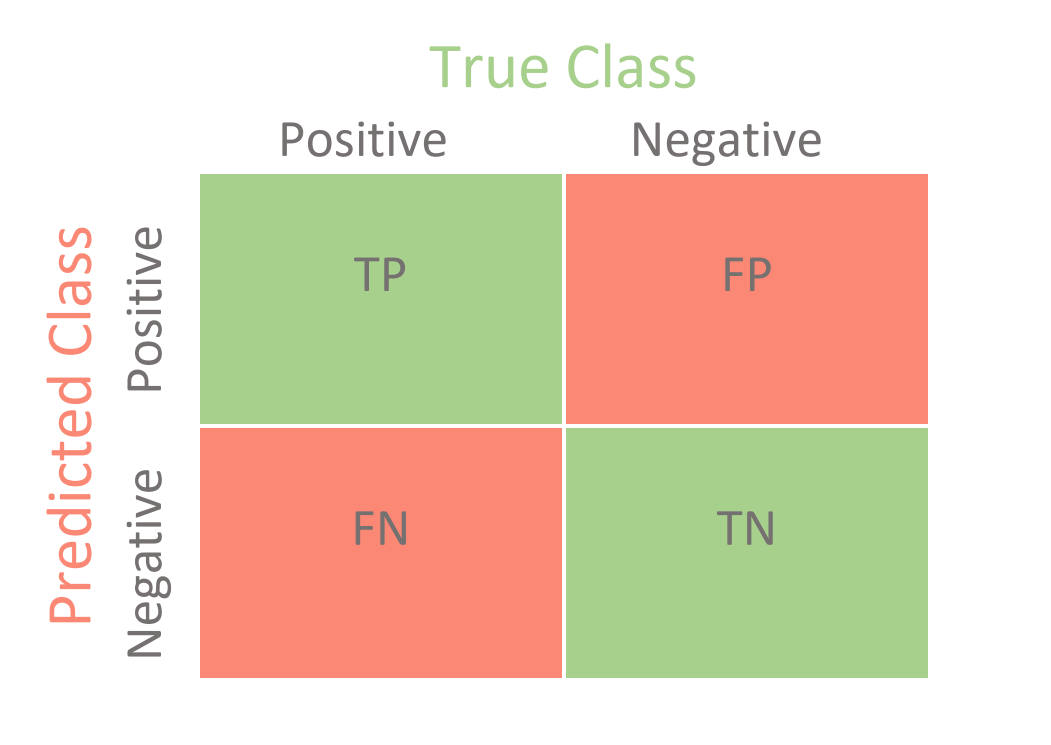

In [44]:
from IPython.display import Image

image_path = "confusion_matrix.png"
Image(filename=image_path)

** **

## K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\alfon\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\alfon\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

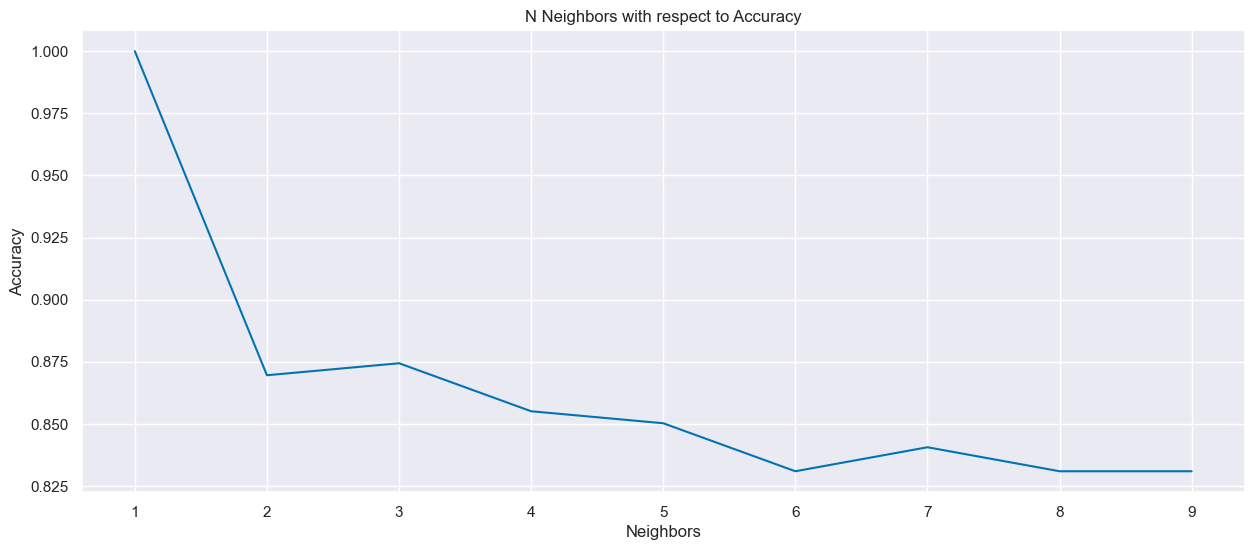

In [77]:
list1 = []

for neighbors in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_train_pred = classifier.predict(x_train)
    list1.append(accuracy_score(y_train, y_train_pred))
plt.plot(list(range(1,10)), list1)
plt.title('N Neighbors with respect to Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [47]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

C:\Users\alfon\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\alfon\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [48]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

acc_train_knn = accuracy_score(y_train, y_train_pred)
acc_knn = accuracy_score(y_test, y_pred)

precision_train_knn = precision_score(y_train, y_train_pred)
precision_knn = precision_score(y_test, y_pred)

recall_train_knn = recall_score(y_train, y_train_pred)
recall_knn = recall_score(y_test, y_pred)

f1_train_knn = f1_score(y_train, y_train_pred)
f1_knn = f1_score(y_test, y_pred)

mylist.append(acc_knn)

print('K-Nearest Neighbors')
print('')
print(f'Training Set:')
print(f'Confusion Matrix: \n{cm_train}')
print(f'Accuracy: {acc_train_knn:.4f}')
print(f'Precision: {precision_train_knn:.4f}')
print(f'Recall: {recall_train_knn:.4f}')
print(f'F1: {f1_train_knn:.4f}')
print('------------------')
print(f'Test Set:')
print(f'Confusion Matrix: \n{cm_test}')
print(f'Accuracy: {acc_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1: {f1_knn:.4f}')

K-Nearest Neighbors

Training Set:
Confusion Matrix: 
[[126  12]
 [ 14  55]]
Accuracy: 0.8744
Precision: 0.8209
Recall: 0.7971
F1: 0.8088
------------------
Test Set:
Confusion Matrix: 
[[57  7]
 [10 16]]
Accuracy: 0.8111
Precision: 0.6957
Recall: 0.6154
F1: 0.6531


** **

## Support Vector Machines

In [49]:
from sklearn.svm import SVC

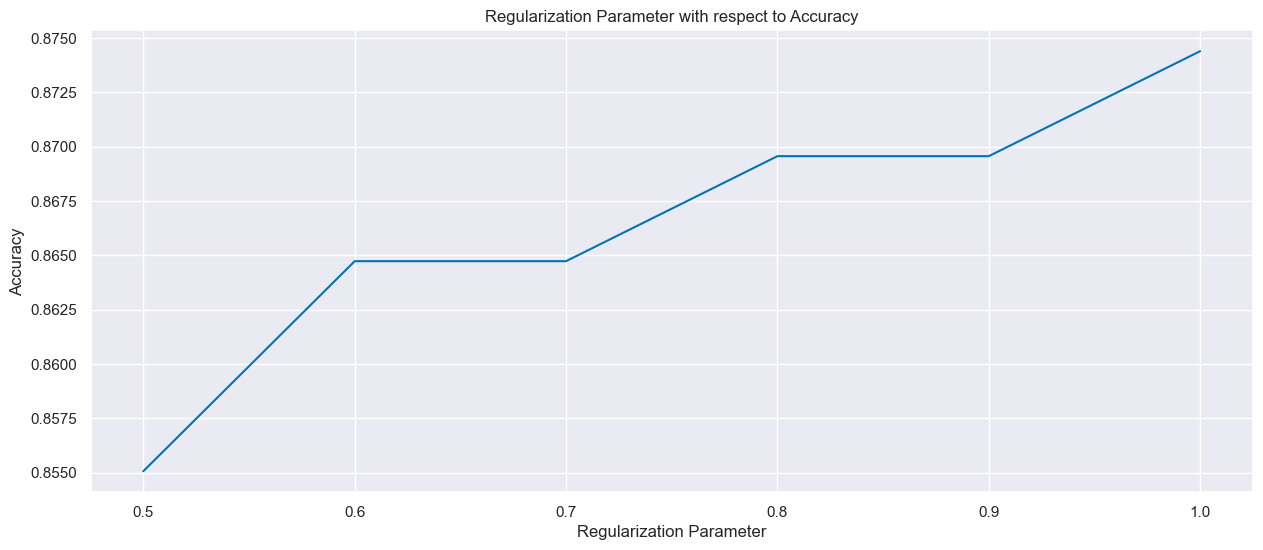

In [78]:
list1 = []

for c in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    classifier = SVC(C=c, random_state=42, kernel='rbf')
    classifier.fit(x_train, y_train)
    y_train_pred = classifier.predict(x_train)
    list1.append(accuracy_score(y_train, y_train_pred))

plt.plot([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], list1)
plt.title('Regularization Parameter with respect to Accuracy')
plt.xlabel('Regularization Parameter')
plt.ylabel('Accuracy')
plt.show()

In [51]:
classifier = SVC(C=0.9, random_state=42, kernel='rbf')
classifier.fit(x_train, y_train)

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

In [52]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

acc_train_svc = accuracy_score(y_train, y_train_pred)
acc_svc= accuracy_score(y_test, y_pred)

precision_train_svc = precision_score(y_train, y_train_pred)
precision_svc = precision_score(y_test, y_pred)

recall_train_svc = recall_score(y_train, y_train_pred)
recall_svc = recall_score(y_test, y_pred)

f1_train_svc = f1_score(y_train, y_train_pred)
f1_svc = f1_score(y_test, y_pred)

print('Support Vector Machines')
print('')
print(f'Training Set:')
print(f'Confusion Matrix: \n{cm_train}')
print(f'Accuracy: {acc_train_svc:.4f}')
print(f'Precision: {precision_train_svc:.4f}')
print(f'Recall: {recall_train_svc:.4f}')
print(f'F1: {f1_train_svc:.4f}')
print('------------------')
print(f'Test Set:')
print(f'Confusion Matrix: \n{cm_test}')
print(f'Accuracy: {acc_svc:.4f}')
print(f'Precision: {precision_svc:.4f}')
print(f'Recall: {recall_svc:.4f}')
print(f'F1: {f1_svc:.4f}')

Support Vector Machines

Training Set:
Confusion Matrix: 
[[124  14]
 [ 13  56]]
Accuracy: 0.8696
Precision: 0.8000
Recall: 0.8116
F1: 0.8058
------------------
Test Set:
Confusion Matrix: 
[[57  7]
 [ 9 17]]
Accuracy: 0.8222
Precision: 0.7083
Recall: 0.6538
F1: 0.6800


** **

## Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

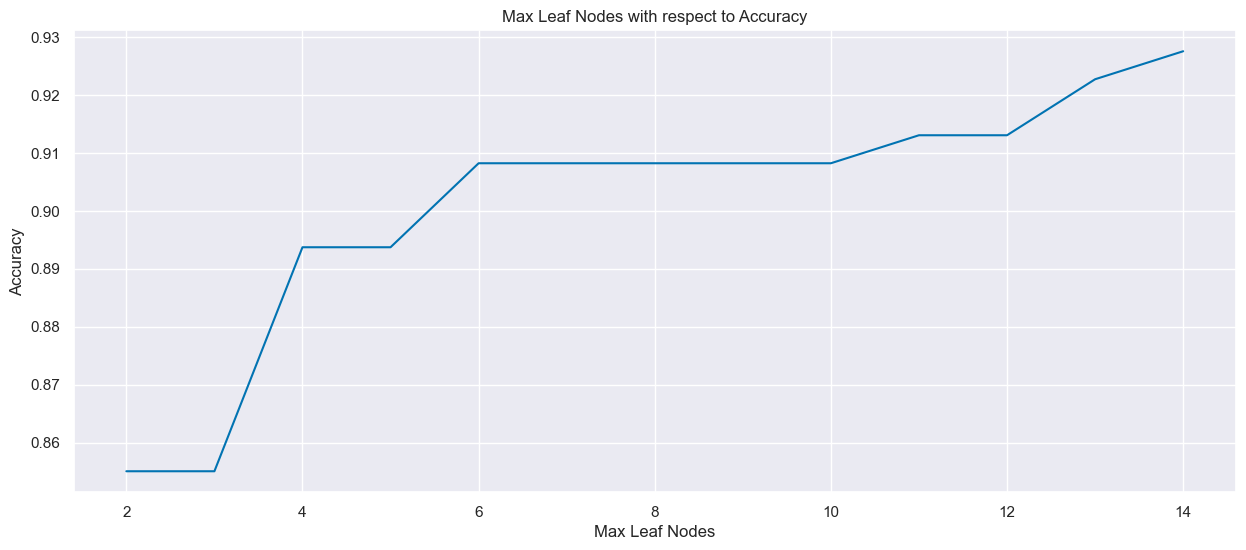

In [79]:
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=42, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_train_pred = classifier.predict(x_train)
    list1.append(accuracy_score(y_train, y_train_pred))

plt.plot(list(range(2,15)), list1)
plt.title('Max Leaf Nodes with respect to Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.show()

In [55]:
classifier = DecisionTreeClassifier(max_leaf_nodes=12, random_state=42, criterion='entropy')
classifier.fit(x_train, y_train)

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

In [56]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

acc_train_dectree = accuracy_score(y_train, y_train_pred)
acc_dectree = accuracy_score(y_test, y_pred)

precision_train_dectree = precision_score(y_train, y_train_pred)
precision_dectree = precision_score(y_test, y_pred)

recall_train_dectree = recall_score(y_train, y_train_pred)
recall_dectree = recall_score(y_test, y_pred)

f1_train_dectree = f1_score(y_train, y_train_pred)
f1_dectree = f1_score(y_test, y_pred)

print('Decision Tree')
print('')
print(f'Training Set:')
print(f'Confusion Matrix: \n{cm_train}')
print(f'Accuracy: {acc_train_dectree:.4f}')
print(f'Precision: {precision_train_dectree:.4f}')
print(f'Recall: {recall_train_dectree:.4f}')
print(f'F1: {f1_train_dectree:.4f}')
print('------------------')
print(f'Test Set:')
print(f'Confusion Matrix: \n{cm_test}')
print(f'Accuracy: {acc_dectree:.4f}')
print(f'Precision: {precision_dectree:.4f}')
print(f'Recall: {recall_dectree:.4f}')
print(f'F1: {f1_dectree:.4f}')

Decision Tree

Training Set:
Confusion Matrix: 
[[127  11]
 [  7  62]]
Accuracy: 0.9130
Precision: 0.8493
Recall: 0.8986
F1: 0.8732
------------------
Test Set:
Confusion Matrix: 
[[54 10]
 [ 8 18]]
Accuracy: 0.8000
Precision: 0.6429
Recall: 0.6923
F1: 0.6667


** **

## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

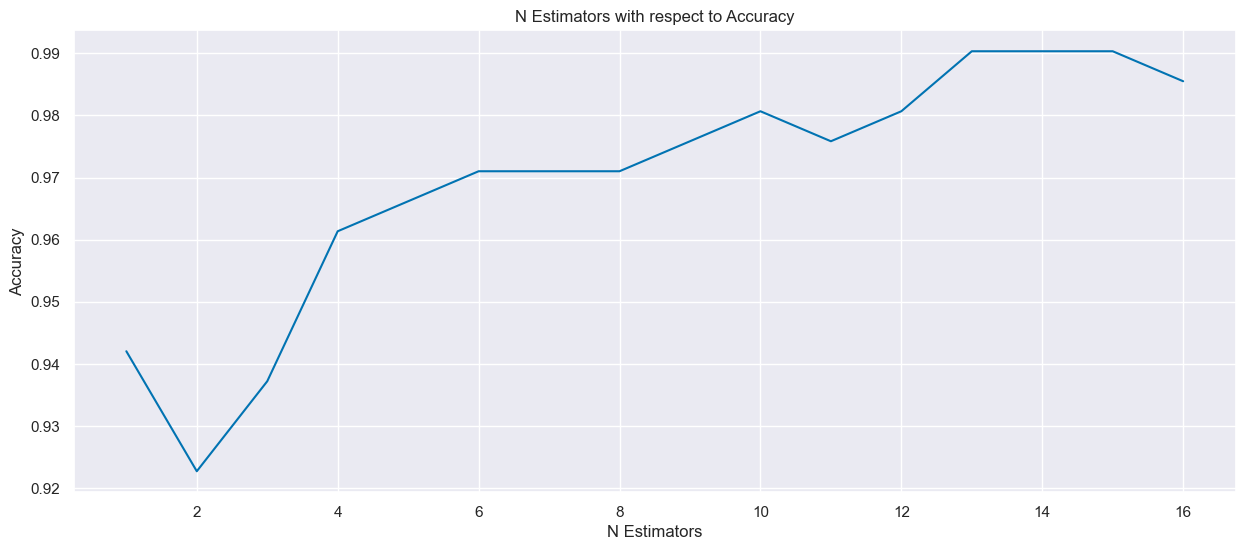

In [80]:
list1 = []

for estimators in range(1,17):
    classifier = RandomForestClassifier(n_estimators=estimators, random_state=42, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_train_pred = classifier.predict(x_train)
    list1.append(accuracy_score(y_train, y_train_pred))
    
plt.plot(list(range(1,17)), list1)
plt.title('N Estimators with respect to Accuracy')
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.show()

In [59]:
classifier = RandomForestClassifier(n_estimators=2, random_state=42, criterion='entropy')
classifier.fit(x_train, y_train)

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

In [60]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

acc_train_rfc = accuracy_score(y_train, y_train_pred)
acc_rfc = accuracy_score(y_test, y_pred)

precision_train_rfc = precision_score(y_train, y_train_pred)
precision_rfc = precision_score(y_test, y_pred)

recall_train_rfc = recall_score(y_train, y_train_pred)
recall_rfc = recall_score(y_test, y_pred)

f1_train_rfc = f1_score(y_train, y_train_pred)
f1_rfc = f1_score(y_test, y_pred)

print('Random Forest')
print('')
print(f'Training Set:')
print(f'Confusion Matrix: \n{cm_train}')
print(f'Accuracy: {acc_train_rfc:.4f}')
print(f'Precision: {precision_train_rfc:.4f}')
print(f'Recall: {recall_train_rfc:.4f}')
print(f'F1: {f1_train_rfc:.4f}')
print('------------------')
print(f'Test Set:')
print(f'Confusion Matrix: \n{cm_test}')
print(f'Accuracy: {acc_rfc:.4f}')
print(f'Precision: {precision_rfc:.4f}')
print(f'Recall: {recall_rfc:.4f}')
print(f'F1: {f1_rfc:.4f}')

Random Forest

Training Set:
Confusion Matrix: 
[[136   2]
 [ 14  55]]
Accuracy: 0.9227
Precision: 0.9649
Recall: 0.7971
F1: 0.8730
------------------
Test Set:
Confusion Matrix: 
[[54 10]
 [14 12]]
Accuracy: 0.7333
Precision: 0.5455
Recall: 0.4615
F1: 0.5000


Baed off training set's high metric scores compared to test set, the algorithm would require additional diagnostics to yield better results and steer away from overfitting such as hyper-parameter tuning and/or better feature selection. In this instance we will leave the model as is.

** **

## Artificial Neural Network

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
np.random.seed(42)

In [62]:
model = Sequential([
    Dense(units=7, activation='relu'),
    Dense(units=7, activation='relu'),
    Dense(units=7, activation='relu'),
    Dense(units=7, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 1ms/step - loss: 0.6744 - accuracy: 0.7005
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.7488
Epoch 3/100
13/13 [==============================] - 0s 979us/step - loss: 0.6411 - accuracy: 0.7778
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.7826
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7826
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.7971
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.8213
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.8309
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.8357
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.8406
Epoch 1

13/13 [==============================] - 0s 874us/step - loss: 0.3086 - accuracy: 0.8744
Epoch 83/100
13/13 [==============================] - 0s 967us/step - loss: 0.3080 - accuracy: 0.8744
Epoch 84/100
13/13 [==============================] - 0s 940us/step - loss: 0.3077 - accuracy: 0.8647
Epoch 85/100
13/13 [==============================] - 0s 864us/step - loss: 0.3073 - accuracy: 0.8696
Epoch 86/100
13/13 [==============================] - 0s 950us/step - loss: 0.3067 - accuracy: 0.8696
Epoch 87/100
13/13 [==============================] - 0s 883us/step - loss: 0.3062 - accuracy: 0.8744
Epoch 88/100
13/13 [==============================] - 0s 949us/step - loss: 0.3064 - accuracy: 0.8744
Epoch 89/100
13/13 [==============================] - 0s 910us/step - loss: 0.3059 - accuracy: 0.8744
Epoch 90/100
13/13 [==============================] - 0s 989us/step - loss: 0.3058 - accuracy: 0.8744
Epoch 91/100
13/13 [==============================] - 0s 921us/step - loss: 0.3060 - accuracy: 

In [63]:
y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)

y_train_pred = y_train_pred > 0.5
y_pred = y_pred > 0.5

np.set_printoptions()

3/3 [==============================] - 0s 1ms/step


In [64]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

acc_train_ann = accuracy_score(y_train, y_train_pred)
acc_ann = accuracy_score(y_test, y_pred)

precision_train_ann = precision_score(y_train, y_train_pred)
precision_ann = precision_score(y_test, y_pred)

recall_train_ann = recall_score(y_train, y_train_pred)
recall_ann = recall_score(y_test, y_pred)

f1_train_ann = f1_score(y_train, y_train_pred)
f1_ann = f1_score(y_test, y_pred)

mylist.append(acc_ann)

print('Artificial Neural Network')
print('')
print(f'Training Set:')
print(f'Confusion Matrix: \n{cm_train}')
print(f'Accuracy: {acc_train_ann:.4f}')
print(f'Precision: {precision_train_ann:.4f}')
print(f'Recall: {recall_train_ann:.4f}')
print(f'F1: {f1_train_ann:.4f}')
print('------------------')
print(f'Test Set:')
print(f'Confusion Matrix: \n{cm_test}')
print(f'Accuracy: {acc_ann:.4f}')
print(f'Precision: {precision_ann:.4f}')
print(f'Recall: {recall_ann:.4f}')
print(f'F1: {f1_ann:.4f}')

Artificial Neural Network

Training Set:
Confusion Matrix: 
[[126  12]
 [ 13  56]]
Accuracy: 0.8792
Precision: 0.8235
Recall: 0.8116
F1: 0.8175
------------------
Test Set:
Confusion Matrix: 
[[57  7]
 [ 9 17]]
Accuracy: 0.8222
Precision: 0.7083
Recall: 0.6538
F1: 0.6800


** **

## XGBoost

In [65]:
from xgboost import XGBClassifier

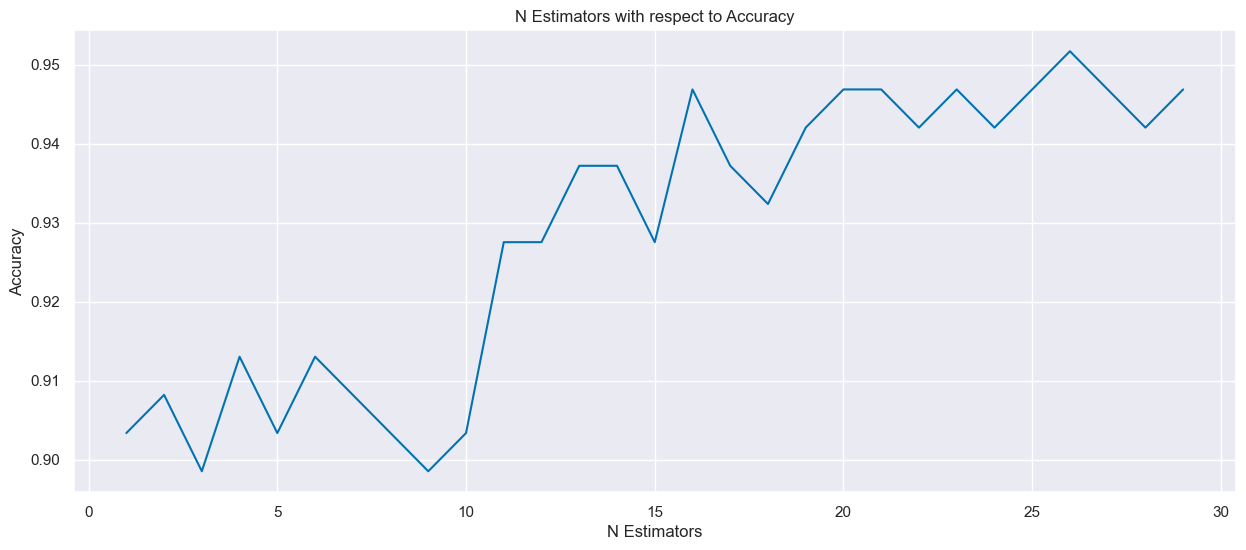

In [81]:
list1 = []

for estimators in range(1,30,1):
    classifier = XGBClassifier(n_estimators=estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_train_pred = classifier.predict(x_train)
    list1.append(accuracy_score(y_train, y_train_pred))
    
plt.plot(list(range(1,30,1)), list1)
plt.title('N Estimators with respect to Accuracy')
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.show()

In [67]:
classifier = XGBClassifier(n_estimators=5, max_depth=12, subsample=0.7)
classifier.fit(x_train, y_train)

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

In [68]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

acc_train_xgb = accuracy_score(y_train, y_train_pred)
acc_xgb = accuracy_score(y_test, y_pred)

precision_train_xgb = precision_score(y_train, y_train_pred)
precision_xgb = precision_score(y_test, y_pred)

recall_train_xgb = recall_score(y_train, y_train_pred)
recall_xgb = recall_score(y_test, y_pred)

f1_train_xgb = f1_score(y_train, y_train_pred)
f1_xgb = f1_score(y_test, y_pred)

mylist.append(acc_xgb)

print('XGBoost')
print('')
print(f'Training Set:')
print(f'Confusion Matrix: \n{cm_train}')
print(f'Accuracy: {acc_train_xgb:.4f}')
print(f'Precision: {precision_train_xgb:.4f}')
print(f'Recall: {recall_train_xgb:.4f}')
print(f'F1: {f1_train_xgb:.4f}')
print('------------------')
print(f'Test Set:')
print(f'Confusion Matrix: \n{cm_test}')
print(f'Accuracy: {acc_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1: {f1_xgb:.4f}')

XGBoost

Training Set:
Confusion Matrix: 
[[128  10]
 [ 10  59]]
Accuracy: 0.9034
Precision: 0.8551
Recall: 0.8551
F1: 0.8551
------------------
Test Set:
Confusion Matrix: 
[[55  9]
 [ 8 18]]
Accuracy: 0.8111
Precision: 0.6667
Recall: 0.6923
F1: 0.6792


** **

## CatBoost

In [69]:
from catboost import CatBoostClassifier

In [70]:
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.005258
0:	learn: 0.6887896	total: 146ms	remaining: 2m 26s
1:	learn: 0.6841108	total: 147ms	remaining: 1m 13s
2:	learn: 0.6781565	total: 148ms	remaining: 49.3s
3:	learn: 0.6739362	total: 149ms	remaining: 37.2s
4:	learn: 0.6696064	total: 150ms	remaining: 29.9s
5:	learn: 0.6643174	total: 152ms	remaining: 25.1s
6:	learn: 0.6603806	total: 153ms	remaining: 21.6s
7:	learn: 0.6565344	total: 154ms	remaining: 19.1s
8:	learn: 0.6531295	total: 155ms	remaining: 17s
9:	learn: 0.6493783	total: 156ms	remaining: 15.4s
10:	learn: 0.6468781	total: 157ms	remaining: 14.1s
11:	learn: 0.6421981	total: 158ms	remaining: 13s
12:	learn: 0.6388589	total: 159ms	remaining: 12.1s
13:	learn: 0.6352898	total: 160ms	remaining: 11.3s
14:	learn: 0.6316116	total: 161ms	remaining: 10.6s
15:	learn: 0.6285658	total: 162ms	remaining: 9.96s
16:	learn: 0.6248758	total: 163ms	remaining: 9.41s
17:	learn: 0.6203225	total: 164ms	remaining: 8.93s
18:	learn: 0.6169789	total: 165ms	remaining: 8.5s
19:	learn: 0.6

261:	learn: 0.2736767	total: 401ms	remaining: 1.13s
262:	learn: 0.2732263	total: 402ms	remaining: 1.13s
263:	learn: 0.2724947	total: 403ms	remaining: 1.12s
264:	learn: 0.2722461	total: 404ms	remaining: 1.12s
265:	learn: 0.2717730	total: 405ms	remaining: 1.12s
266:	learn: 0.2712144	total: 406ms	remaining: 1.11s
267:	learn: 0.2708711	total: 407ms	remaining: 1.11s
268:	learn: 0.2704171	total: 408ms	remaining: 1.11s
269:	learn: 0.2699550	total: 409ms	remaining: 1.11s
270:	learn: 0.2695771	total: 410ms	remaining: 1.1s
271:	learn: 0.2689946	total: 412ms	remaining: 1.1s
272:	learn: 0.2685003	total: 413ms	remaining: 1.1s
273:	learn: 0.2679742	total: 414ms	remaining: 1.1s
274:	learn: 0.2674784	total: 415ms	remaining: 1.09s
275:	learn: 0.2670809	total: 416ms	remaining: 1.09s
276:	learn: 0.2666321	total: 417ms	remaining: 1.09s
277:	learn: 0.2663687	total: 419ms	remaining: 1.09s
278:	learn: 0.2659145	total: 420ms	remaining: 1.08s
279:	learn: 0.2654807	total: 421ms	remaining: 1.08s
280:	learn: 0.26

446:	learn: 0.2141763	total: 593ms	remaining: 734ms
447:	learn: 0.2140509	total: 594ms	remaining: 732ms
448:	learn: 0.2137273	total: 595ms	remaining: 730ms
449:	learn: 0.2134660	total: 596ms	remaining: 729ms
450:	learn: 0.2131000	total: 597ms	remaining: 727ms
451:	learn: 0.2126761	total: 598ms	remaining: 725ms
452:	learn: 0.2124950	total: 599ms	remaining: 724ms
453:	learn: 0.2122873	total: 600ms	remaining: 722ms
454:	learn: 0.2120860	total: 601ms	remaining: 720ms
455:	learn: 0.2118753	total: 602ms	remaining: 719ms
456:	learn: 0.2116602	total: 603ms	remaining: 717ms
457:	learn: 0.2114391	total: 604ms	remaining: 715ms
458:	learn: 0.2112395	total: 605ms	remaining: 714ms
459:	learn: 0.2110318	total: 607ms	remaining: 712ms
460:	learn: 0.2107621	total: 608ms	remaining: 710ms
461:	learn: 0.2106527	total: 608ms	remaining: 709ms
462:	learn: 0.2105297	total: 610ms	remaining: 707ms
463:	learn: 0.2104175	total: 610ms	remaining: 705ms
464:	learn: 0.2101840	total: 611ms	remaining: 703ms
465:	learn: 

655:	learn: 0.1753321	total: 790ms	remaining: 414ms
656:	learn: 0.1751607	total: 791ms	remaining: 413ms
657:	learn: 0.1749812	total: 793ms	remaining: 412ms
658:	learn: 0.1748595	total: 794ms	remaining: 411ms
659:	learn: 0.1746771	total: 795ms	remaining: 409ms
660:	learn: 0.1744761	total: 796ms	remaining: 408ms
661:	learn: 0.1743075	total: 797ms	remaining: 407ms
662:	learn: 0.1741776	total: 798ms	remaining: 406ms
663:	learn: 0.1740768	total: 799ms	remaining: 404ms
664:	learn: 0.1738998	total: 800ms	remaining: 403ms
665:	learn: 0.1737457	total: 801ms	remaining: 402ms
666:	learn: 0.1737223	total: 802ms	remaining: 400ms
667:	learn: 0.1735895	total: 803ms	remaining: 399ms
668:	learn: 0.1734733	total: 804ms	remaining: 398ms
669:	learn: 0.1733395	total: 805ms	remaining: 397ms
670:	learn: 0.1732157	total: 806ms	remaining: 395ms
671:	learn: 0.1730282	total: 807ms	remaining: 394ms
672:	learn: 0.1728165	total: 808ms	remaining: 393ms
673:	learn: 0.1726289	total: 809ms	remaining: 391ms
674:	learn: 

850:	learn: 0.1475944	total: 978ms	remaining: 171ms
851:	learn: 0.1475061	total: 979ms	remaining: 170ms
852:	learn: 0.1473490	total: 980ms	remaining: 169ms
853:	learn: 0.1472254	total: 981ms	remaining: 168ms
854:	learn: 0.1470619	total: 982ms	remaining: 167ms
855:	learn: 0.1469576	total: 984ms	remaining: 165ms
856:	learn: 0.1468873	total: 985ms	remaining: 164ms
857:	learn: 0.1467091	total: 986ms	remaining: 163ms
858:	learn: 0.1465770	total: 987ms	remaining: 162ms
859:	learn: 0.1463991	total: 988ms	remaining: 161ms
860:	learn: 0.1462790	total: 989ms	remaining: 160ms
861:	learn: 0.1462407	total: 990ms	remaining: 159ms
862:	learn: 0.1461624	total: 991ms	remaining: 157ms
863:	learn: 0.1460577	total: 992ms	remaining: 156ms
864:	learn: 0.1459728	total: 993ms	remaining: 155ms
865:	learn: 0.1459554	total: 994ms	remaining: 154ms
866:	learn: 0.1457936	total: 995ms	remaining: 153ms
867:	learn: 0.1456661	total: 996ms	remaining: 151ms
868:	learn: 0.1455280	total: 997ms	remaining: 150ms
869:	learn: 

In [71]:
y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

In [72]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

acc_train_cat = accuracy_score(y_train, y_train_pred)
acc_cat = accuracy_score(y_test, y_pred)

precision_train_cat = precision_score(y_train, y_train_pred)
precision_cat = precision_score(y_test, y_pred)

recall_train_cat = recall_score(y_train, y_train_pred)
recall_cat = recall_score(y_test, y_pred)

f1_train_cat = f1_score(y_train, y_train_pred)
f1_cat = f1_score(y_test, y_pred)

mylist.append(acc_cat)

print('CatBoost')
print('')
print(f'Training Set:')
print(f'Confusion Matrix: \n{cm_train}')
print(f'Accuracy: {acc_train_cat:.4f}')
print(f'Precision: {precision_train_cat:.4f}')
print(f'Recall: {recall_train_cat:.4f}')
print(f'F1: {f1_train_cat:.4f}')
print('------------------')
print(f'Test Set:')
print(f'Confusion Matrix: \n{cm_test}')
print(f'Accuracy: {acc_cat:.4f}')
print(f'Precision: {precision_cat:.4f}')
print(f'Recall: {recall_cat:.4f}')
print(f'F1: {f1_cat:.4f}')

CatBoost

Training Set:
Confusion Matrix: 
[[136   2]
 [  2  67]]
Accuracy: 0.9807
Precision: 0.9710
Recall: 0.9710
F1: 0.9710
------------------
Test Set:
Confusion Matrix: 
[[59  5]
 [ 8 18]]
Accuracy: 0.8556
Precision: 0.7826
Recall: 0.6923
F1: 0.7347


# Model Analysis

In [73]:
models = pd.DataFrame({
    'ML Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines', 'Decision Tree', 'Random Forest',
                 'Artificial Neural Network', 'XGBoost', 'CatBoost'],
    'Accuracy': [acc_logreg, acc_knn, acc_svc, acc_dectree, acc_rfc, acc_ann, acc_xgb, acc_cat],
    'Precision': [precision_logreg, precision_knn, precision_svc, precision_dectree, precision_rfc, precision_ann, 
                 precision_xgb, precision_cat],
    'Recall': [recall_logreg, recall_knn, recall_svc, recall_dectree, recall_rfc, recall_ann, recall_xgb, recall_cat],
    'F1': [f1_logreg, f1_knn, f1_svc, f1_dectree, f1_rfc, f1_ann, f1_xgb, f1_cat]
})

These are the metric results of the models based on how they performed on the test set:

In [74]:
models

,ML Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.788889,0.666667,0.538462,0.595745
1,K-Nearest Neighbors,0.811111,0.695652,0.615385,0.653061
2,Support Vector Machines,0.822222,0.708333,0.653846,0.680000
3,Decision Tree,0.800000,0.642857,0.692308,0.666667
4,Random Forest,0.733333,0.545455,0.461538,0.500000
5,Artificial Neural Network,0.822222,0.708333,0.653846,0.680000
6,XGBoost,0.811111,0.666667,0.692308,0.679245
7,CatBoost,0.855556,0.782609,0.692308,0.734694


We will **rank** the models based on **accuracy** and **F1 score** (harmonic mean of precision and recall):

In [75]:
models.sort_values(by=['Accuracy', 'F1'], ascending=False, ignore_index=True)

,ML Model,Accuracy,Precision,Recall,F1
0,CatBoost,0.855556,0.782609,0.692308,0.734694
1,Support Vector Machines,0.822222,0.708333,0.653846,0.680000
2,Artificial Neural Network,0.822222,0.708333,0.653846,0.680000
3,XGBoost,0.811111,0.666667,0.692308,0.679245
4,K-Nearest Neighbors,0.811111,0.695652,0.615385,0.653061
5,Decision Tree,0.800000,0.642857,0.692308,0.666667
6,Logistic Regression,0.788889,0.666667,0.538462,0.595745
7,Random Forest,0.733333,0.545455,0.461538,0.500000


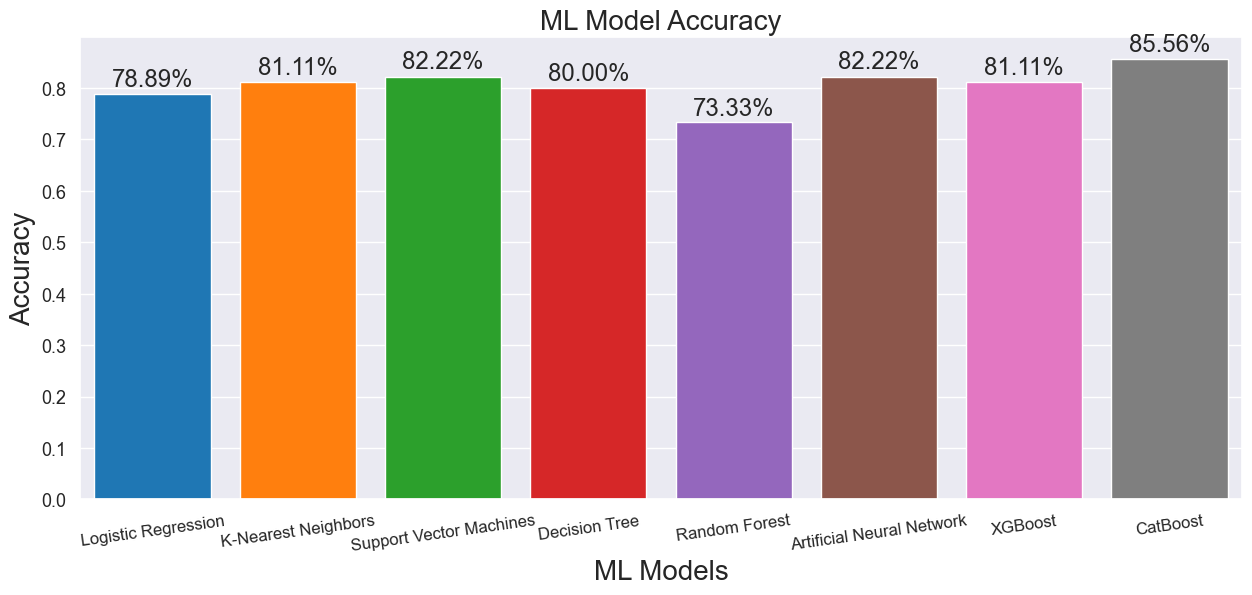

In [76]:
plt.rcParams['figure.figsize']=15,6 
ax = sns.barplot(x=models['ML Model'], y=models['Accuracy'], palette = "tab10", saturation =1.5)
plt.xlabel("ML Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("ML Model Accuracy", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Conclusion

Generally, machine learning algorithms will go through changes such as hyper-parameter tuning to optimize the model. For the purpose of this project we will not be going into great depth to optimize each model and will simply select the best performing one in terms of accuracy. From the model performance results we have determined the CatBoost model to be the best-performing algorithm with an accuracy score of 85.56%.